In [1]:
# Task: Guess an integer between 0-X
# guessing the number v costs v
# after each guess we are told if the answer is bigger or smaller
# goal: minimize total cost of guess

In [12]:
import math
import pylab

In [20]:
max_val = 100

In [21]:
def CST_binary(target_val=50, max_val=100, ratio=0.5, verbose=False):
    # simple binary search by ratio, returns the cost
    
    if ratio > 1:
        return None
    
    floor = 0
    ceil = max_val
    
    if floor == ceil:
        cur_guess = floor
    else:
        cur_guess =  math.floor(float(ratio)*(ceil-floor))
        cost = cur_guess
    
    nb_guesses = 1
    
    if verbose:
        print floor, ceil, cur_guess, cost, nb_guesses
    
    while cur_guess != target_val:
            
        if cur_guess > target_val:
            ceil = cur_guess-1
        if cur_guess < target_val:
            floor = cur_guess+1
            
        if floor == ceil:
            cur_guess = floor
        else:
            cur_guess =  floor + math.floor(float(ratio)*(ceil-floor))
            
        cost += cur_guess
        
        nb_guesses +=1

        if verbose:
            print floor, ceil, cur_guess, cost, nb_guesses
        
        if nb_guesses>max_val+1:
            print target_val, ratio
            return None
    
    return cost

In [22]:
print CST_binary(target_val=99, max_val=100, ratio=0.1, verbose=True)

0 100 10.0 10.0 1
11.0 100 19.0 29.0 2
20.0 100 28.0 57.0 3
29.0 100 36.0 93.0 4
37.0 100 43.0 136.0 5
44.0 100 49.0 185.0 6
50.0 100 55.0 240.0 7
56.0 100 60.0 300.0 8
61.0 100 64.0 364.0 9
65.0 100 68.0 432.0 10
69.0 100 72.0 504.0 11
73.0 100 75.0 579.0 12
76.0 100 78.0 657.0 13
79.0 100 81.0 738.0 14
82.0 100 83.0 821.0 15
84.0 100 85.0 906.0 16
86.0 100 87.0 993.0 17
88.0 100 89.0 1082.0 18
90.0 100 91.0 1173.0 19
92.0 100 92.0 1265.0 20
93.0 100 93.0 1358.0 21
94.0 100 94.0 1452.0 22
95.0 100 95.0 1547.0 23
96.0 100 96.0 1643.0 24
97.0 100 97.0 1740.0 25
98.0 100 98.0 1838.0 26
99.0 100 99.0 1937.0 27
1937.0


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 8.0) #adjust to your screen

In [28]:
# plot CST binary distribution
steps = 100
ratios = [x/float(steps) for x in range(steps+1)]
# print ratios
# CST_bin_dists = [[CST_binary(x, max_val, y) for x in range(max_val+1)] for y in ratios]

CST_bin_dists = {ratio: {x:CST_binary(x, max_val, ratio) for x in range(max_val+1)} for ratio in ratios}

# stats:
CST_bin_dists_averages = {ratio: sum(CST_bin_dists[ratio].values())/float(max_val) for ratio in ratios}


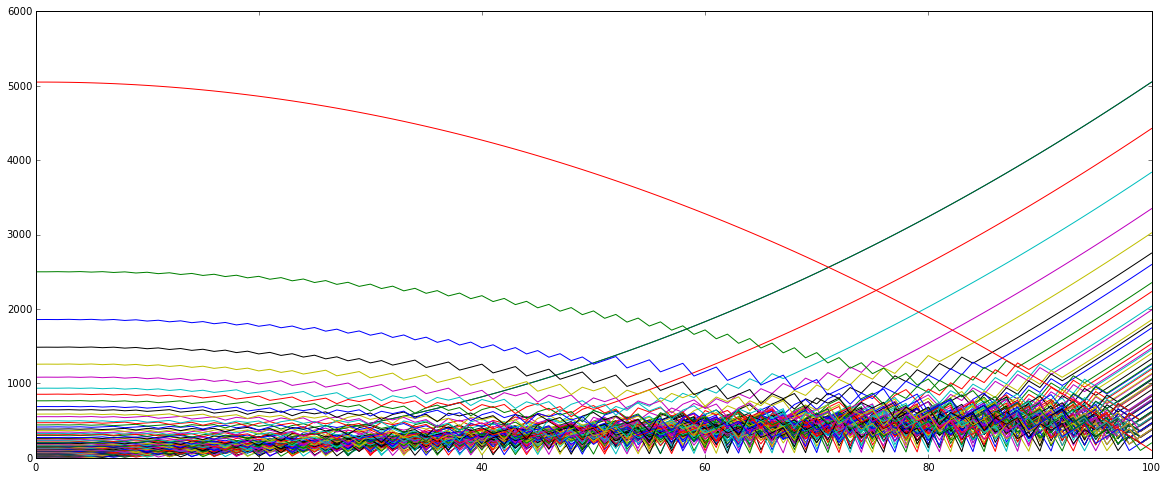

In [29]:
for ratio in ratios:
    plt.plot(CST_bin_dists[ratio].keys(), CST_bin_dists[ratio].values(), label="ratio: "+ str(ratio))
plt.xlim(0,max_val)
if steps <= 10:
    plt.legend()
plt.show()

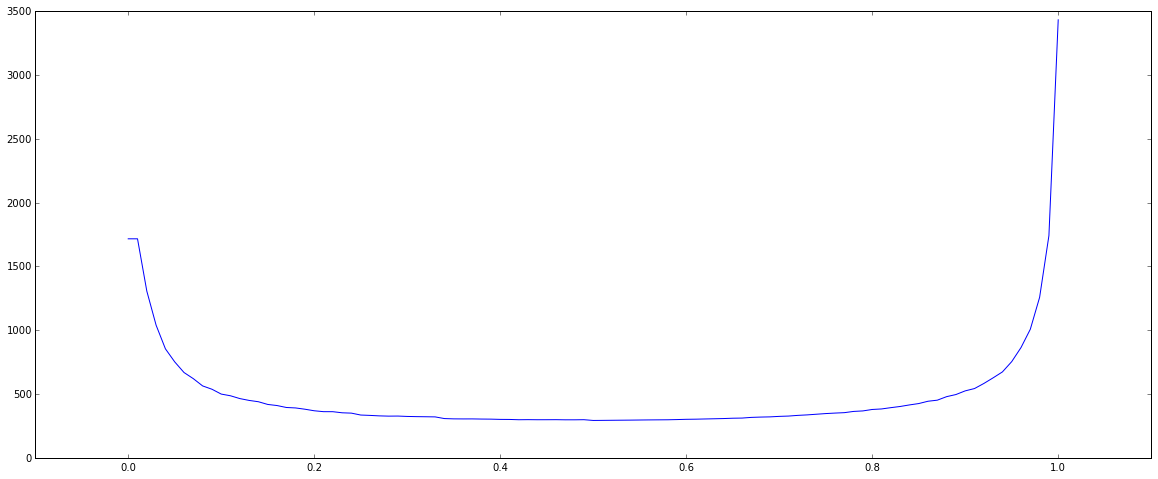

In [30]:
plt.plot(sorted(CST_bin_dists_averages.keys()), [CST_bin_dists_averages[ratio] for ratio in sorted(CST_bin_dists_averages.keys())])
plt.xlim(-0.1,1.1)
plt.show()

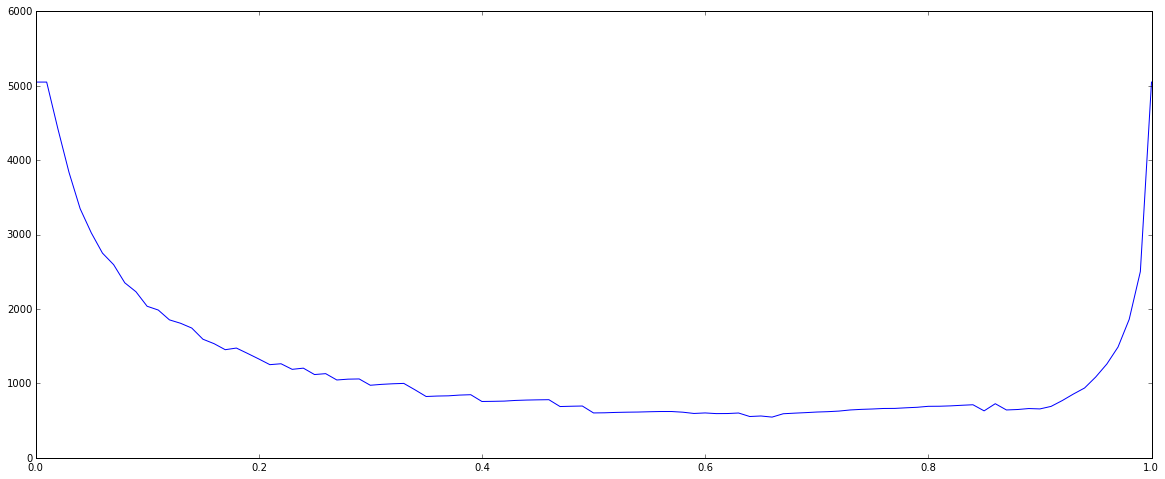

In [31]:
# worst cases
CST_bin_worst = {ratio: max(CST_bin_dists[ratio].values()) for ratio in ratios}
plt.plot(sorted(CST_bin_worst.keys()), [CST_bin_worst[ratio] for ratio in sorted(CST_bin_worst.keys())])
plt.xlim(0,1)
plt.show()

In [ ]:
steps = 10
ratios = [x/float(steps) for x in range(steps+1)]
print ratios
